## This Jupyter file is used for Linear Regresssion Assignment for Bike Sharing business case using data collected for 2 years 2018/2019 
created by Abid Ahmed S for Upgrad Linear Regression Assignment

#### <span style='color:blue'>  Usecase is to understand the factors on which the demand for the shared bikes depends. Specifically to understand the factors affecting the demand for these shared bikes in the American market. The assignment is to know:
<ul>
<li> <span style='color:Dark Green'> Which variables are significant in predicting the demand for shared bikes. </span> </li>
<li> <span style='color:Dark Green'> How well those variables describe the bike demands </span> </li>
</ul>
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. </span>

## 1) Add All Libraries to be imported 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from matplotlib import gridspec

In [3]:
#$ hide the warnings
import warnings
warnings.filterwarnings("ignore")

## 2) Lets do basic study of data set by loading same 

In [4]:
# read the data
bikedata= pd.read_csv("./day.csv")

In [5]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikedata.shape

(730, 16)

In [7]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 3) EDA and also do Data Cleaning if needed for columns of importance 

### 3a
<ul>
<li> <span style='color:blue'> Lets pair plot some variables with cnt based on some focous area. </span> </li>
<li> <span style='color:blue'> Bike usage rental count impact based on weather conditions </span> </li>
</ul>

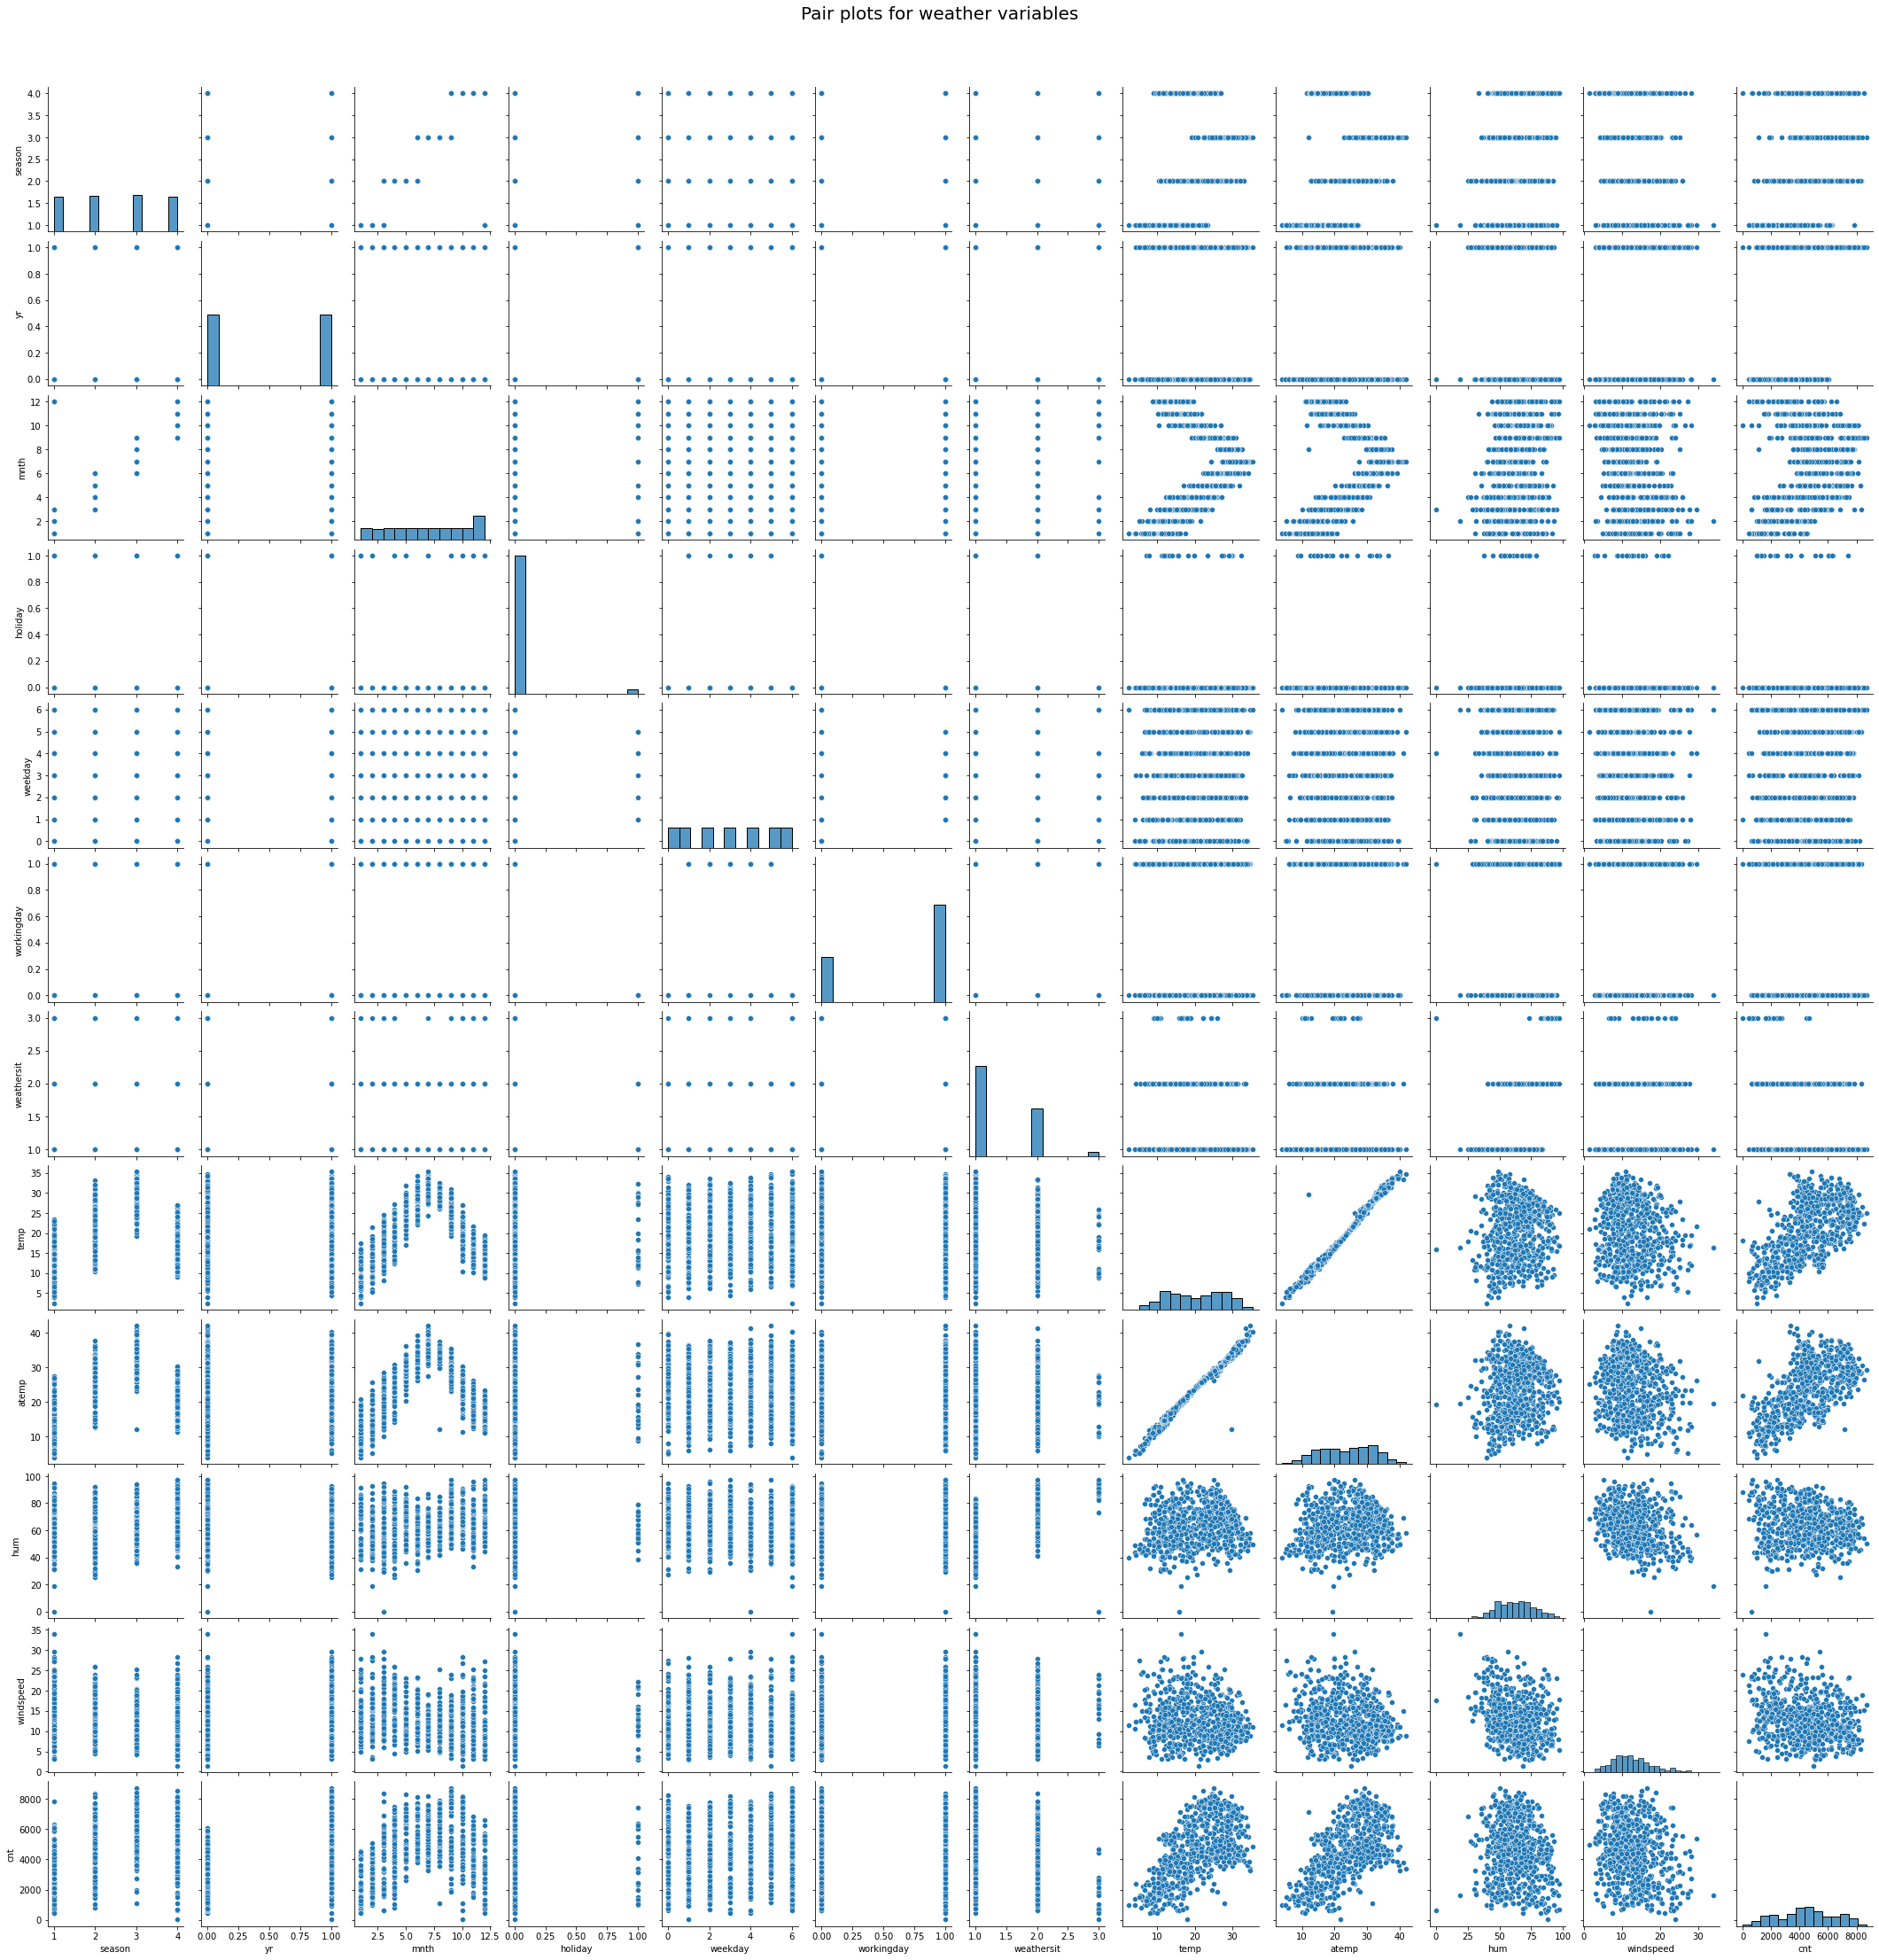

In [16]:

ds1=bikedata.drop(['registered','casual','dteday','instant'],axis=1)
# visualizing the data - the numeric variables
g = sns.pairplot(ds1)
g.fig.suptitle("Pair plots for weather variables", y=1.03, fontsize=20 ) # y= some height>1 
plt.savefig("./charts/pairplot-correlation.png",bbox_inches='tight', dpi=300)
plt.show()


### 3a Inferences
<ul>
<li> <span style='color:blue'> temp and atemp seems to have a obvious liner positive regression relationship </span> </li>
<li> <span style='color:blue'> windspeed and hum have some relationship but not looking obviously linear </span> </li>
<li> <span style='color:blue'> weathersit and season have a relationship as in some categories have higher rental count </span> </li>  
</ul>

### 3b
<ul>
<li> <span style='color:blue'> Lets see correlation histogram some variables with cnt based on some focous area </span> </li>
<li> <span style='color:blue'> Bike rental count correlation with some independant variables </span> </li>
</ul>

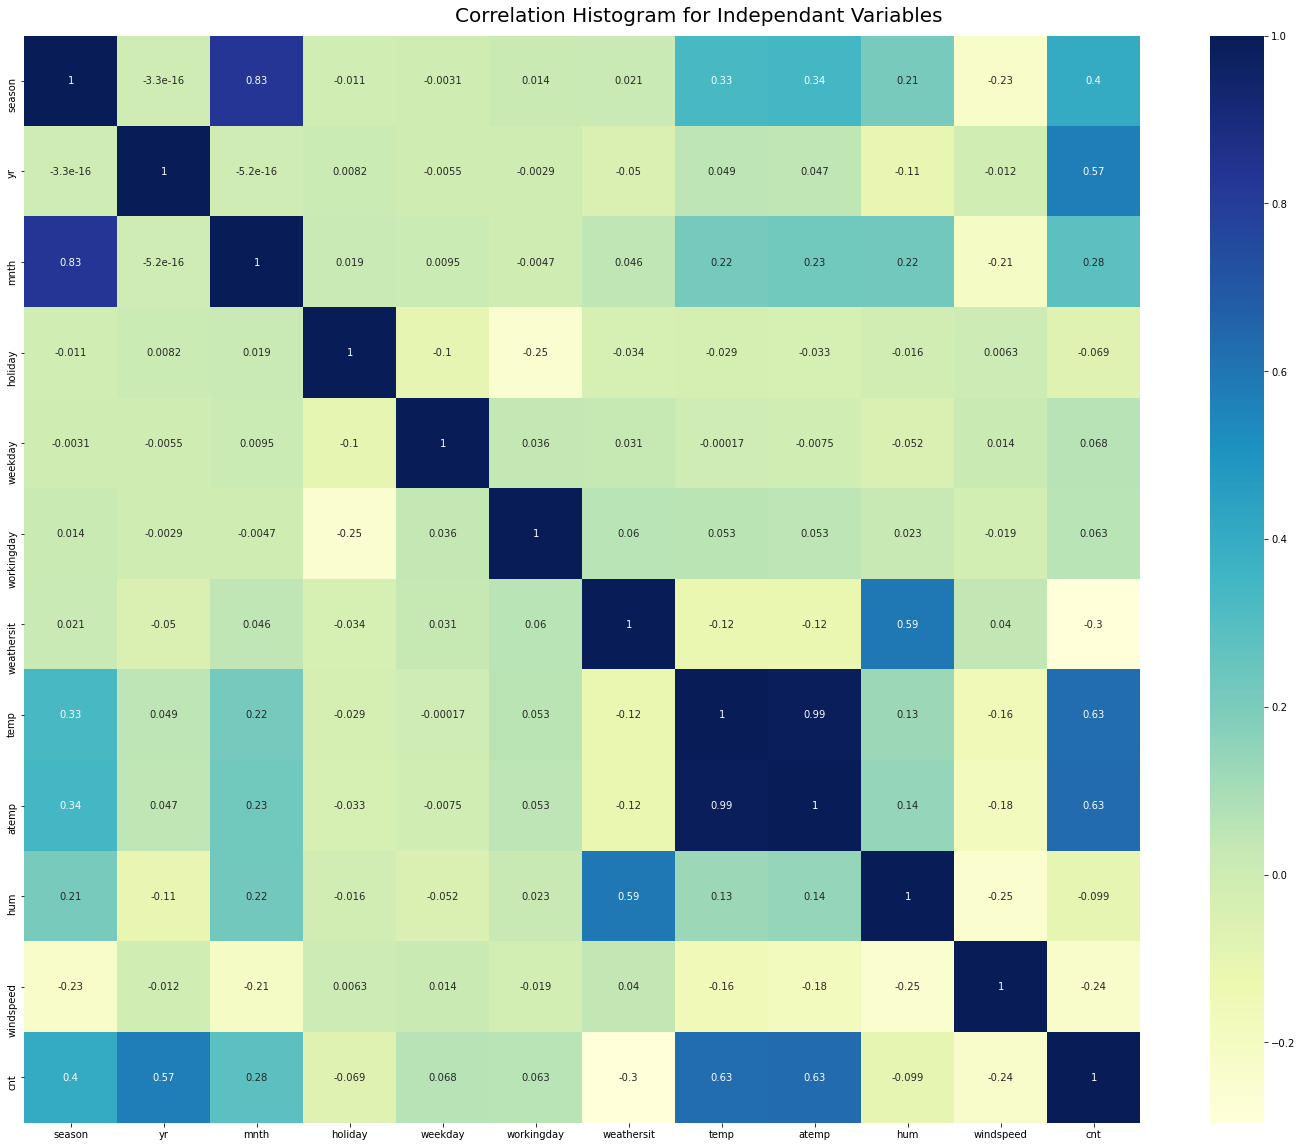

In [18]:

# visualizing the data - with the current used variables
plt.figure(figsize=(25,20))
sns.heatmap(ds1.corr() , annot=True , cmap='YlGnBu')
plt.suptitle("Correlation Histogram for Independant Variables", y=0.9, fontsize=20 ) # y= some height>1 
plt.savefig("./charts/correlationhistogram.png",bbox_inches='tight', dpi=300)
plt.show()


### 3b Inferences
<ul>
<li> <span style='color:blue'> temp,atemp,year have highest correlation with rental count numbers </span> </li>
<li> <span style='color:blue'> season has a decent correlation with rental count numbers </span> </li>
<li> <span style='color:blue'> rest seems to be very meekly correlated </span> </li>  
</ul>

### 3c
### Encoding as per data dictionary few categorical variables for better understanding

#### <span style='color:red'> Note: There seems to be some shift in numbering of the season with respect to month of the year , as per data dictonary , lets correct it while converting back to categorical !! </span>
##### <span style='color:black'>The category values according to Data dictionary does not match with months of the year for the season !! </span>

In [22]:
bikedata['season']=bikedata['season'].apply(lambda x: 'winter' if x == 1 else ('spring' if x == 2 else ( 'fall' if x == 4 else 'summer')))

In [23]:
bikedata.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,winter,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,winter,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


#### As per data dictonary , lets convert weathersit back to categorical !!

In [24]:
bikedata['weathersit']=bikedata['weathersit'].apply(lambda x: 'clearsky' if x == 1 else ('cloudy&mist' if x == 2 else ( 'lightsnowOrrain' if x == 3 else 'heavysnowOrRain')))

In [25]:
bikedata.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,winter,0,1,0,6,0,cloudy&mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,winter,0,1,0,0,0,cloudy&mist,14.902598,17.68695,69.6087,16.652113,131,670,801


#### Also lets convert month and weekday to categorical values for EDA understanding and also for encoding dummy variables.

In [26]:
bikedata['mnth']=bikedata['mnth'].apply(lambda x: 'Jan' if x == 1 else ('Feb' if x == 2 else ( 'Mar' if x == 3 else ('Apr' if x == 4 else ('May' if x == 5 else ('Jun' if x == 6 else ('Jul' if x == 7 else ('Aug' if x == 8 else ('Sep' if x == 9 else('Oct' if x == 10 else ('Nov' if x ==11 else('Dec'))))))))))))

In [27]:
bikedata['weekday']=bikedata['weekday'].apply(lambda x: 'sunday' if x == 5 else ('monday' if x == 6  else ( 'tuesday' if x == 0 else ( 'wednesday' if x== 1 else( 'thursday' if x== 2 else( 'friday' if x== 3 else ('saturday')))) )))

### 3d 
### Box plots of Rental count distribution across different predictors or independant variables

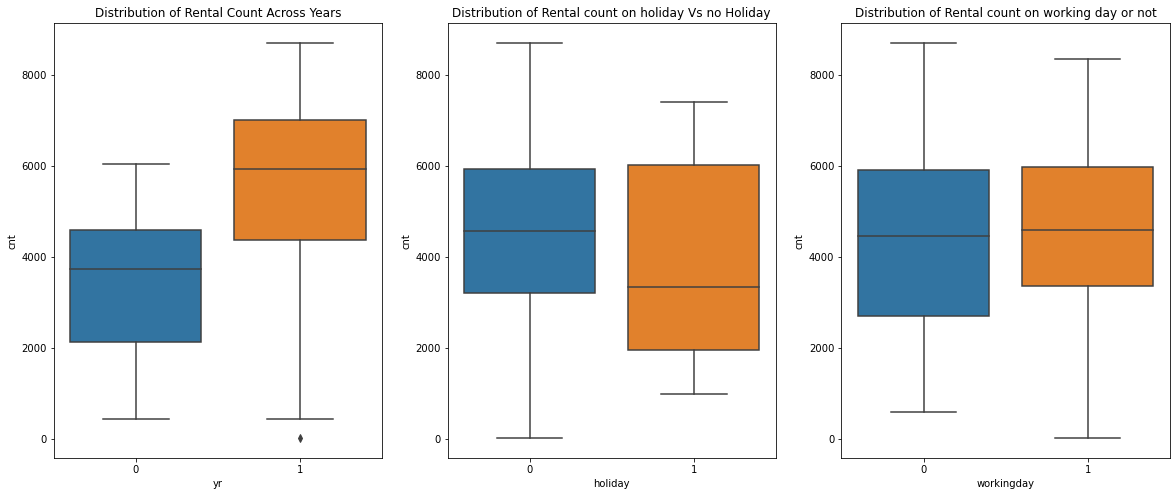

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='yr',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental Count Across Years',fontsize=12)
plt.subplot(1,3,2)
sns.boxplot(x='holiday',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental count on holiday Vs no Holiday',fontsize=12)
plt.subplot(1,3,3)
sns.boxplot(x='workingday',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental count on working day or not',fontsize=12)
plt.savefig("./charts/boxplot1.png",bbox_inches='tight', dpi=300)
plt.show()

### 3e
### Box plots of Rental count Casual Vs Registered distribution across different variables

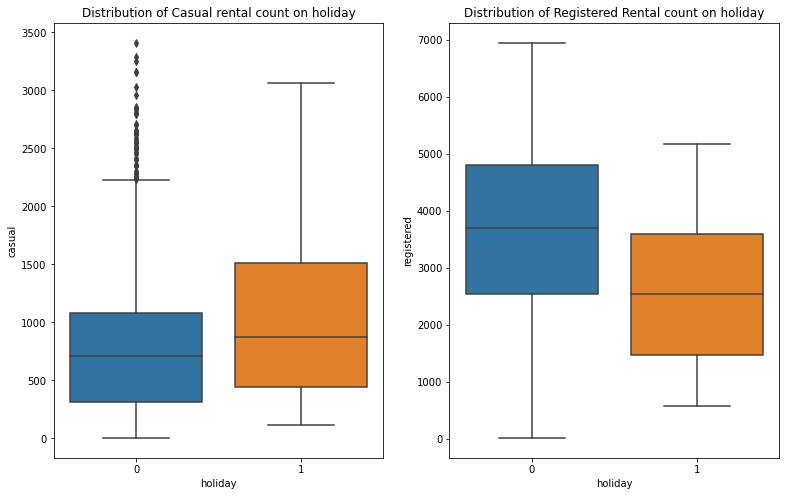

In [29]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.boxplot(x='holiday',y='casual',data=bikedata)
plt.gca().set_title('Distribution of Casual rental count on holiday',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='holiday',y='registered',data=bikedata)
plt.gca().set_title('Distribution of Registered Rental count on holiday',fontsize=12)
plt.savefig("./charts/boxplot2.png",bbox_inches='tight', dpi=300)
plt.show()

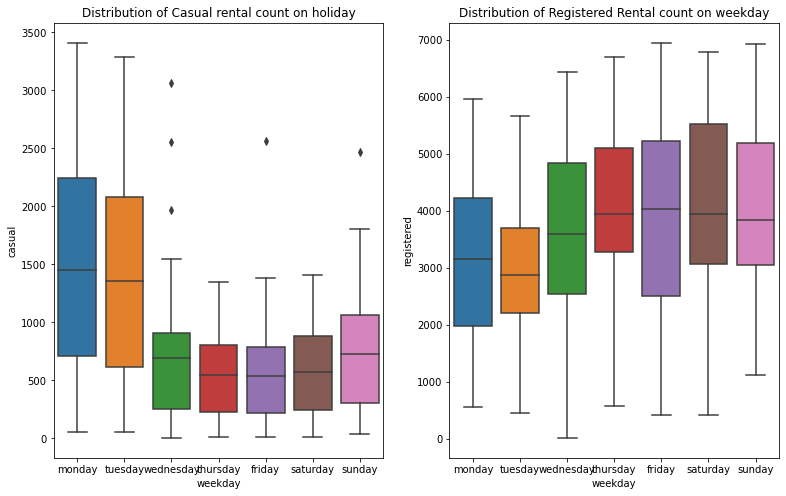

In [30]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.boxplot(x='weekday',y='casual',data=bikedata)
plt.gca().set_title('Distribution of Casual rental count on holiday',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='weekday',y='registered',data=bikedata)
plt.gca().set_title('Distribution of Registered Rental count on weekday',fontsize=12)
plt.savefig("./charts/boxplot3.png",bbox_inches='tight', dpi=300)
plt.show()

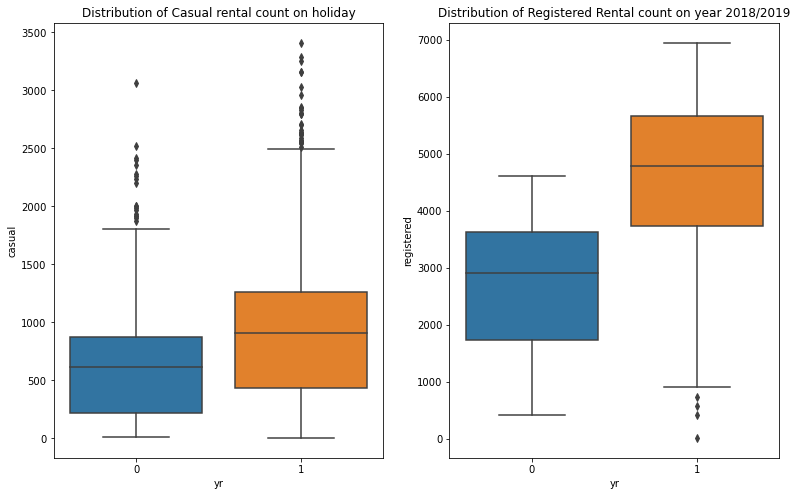

In [32]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.boxplot(x='yr',y='casual',data=bikedata)
plt.gca().set_title('Distribution of Casual rental count on holiday',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='yr',y='registered',data=bikedata)
plt.gca().set_title('Distribution of Registered Rental count on year 2018/2019',fontsize=12)
plt.savefig("./charts/boxplot4.png",bbox_inches='tight', dpi=300)
plt.show()

### 3f
### Box plots of Rental count distribution across other categorical variables

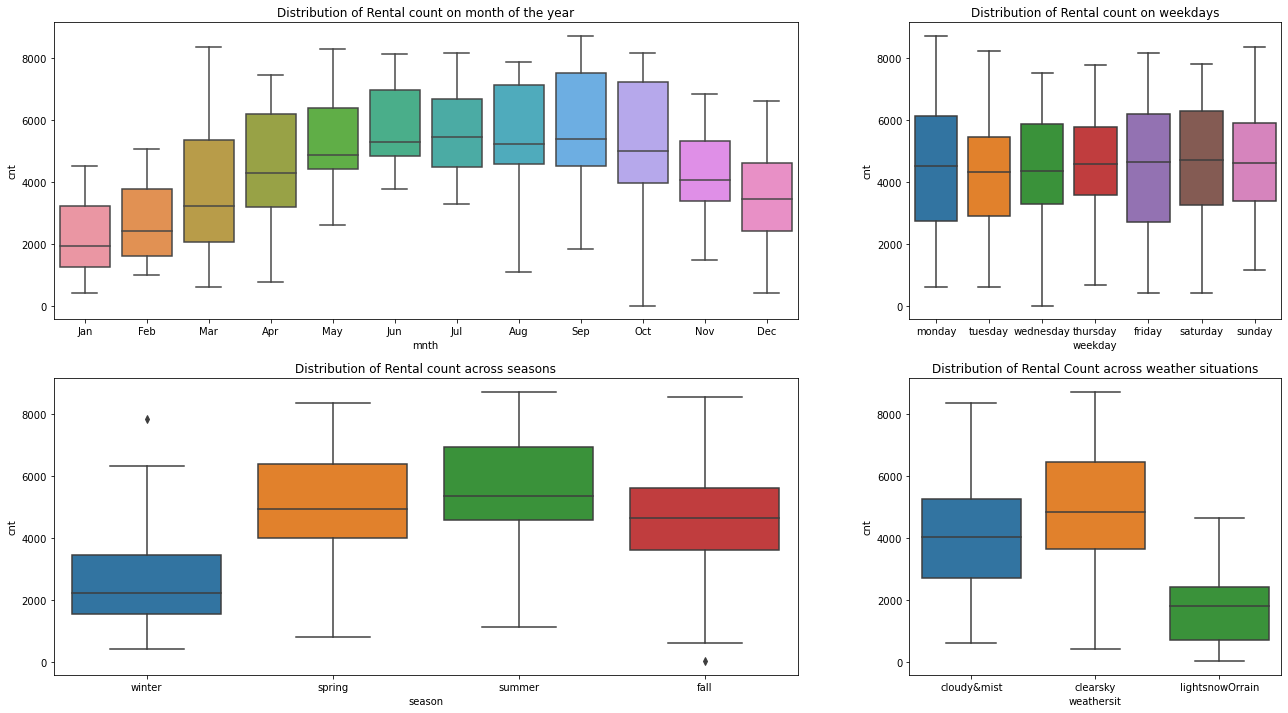

In [33]:
plt.figure(figsize=(22,12))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])
plt.subplot(gs[0])
sns.boxplot(x='mnth',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental count on month of the year',fontsize=12)
plt.subplot(gs[1])
sns.boxplot(x='weekday',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental count on weekdays',fontsize=12)

plt.subplot(gs[2])
sns.boxplot(x='season',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental count across seasons',fontsize=12)
plt.subplot(gs[3])
sns.boxplot(x='weathersit',y='cnt',data=bikedata)
plt.gca().set_title('Distribution of Rental Count across weather situations',fontsize=12)
plt.savefig("./charts/boxplot5.png",bbox_inches='tight', dpi=300)

plt.show()

## 4) Inferences from EDA and plots for understanding factors affecting the bike rental business.
<ul>
<li> <span style='color:blue'> There is clear year on year increase rental count and sales from 2018 to 2019 , probably this might have continued if there was no covid impact , yet to be seen since there is no 2020,2021 data </span> </li>
<li> <span style='color:blue'> There is more rental on non-holiday and count of rentals is high for registered users Vs casual users on weekdays , clearly indicating possibility of more office going or day scholar population using bike during weekdays and nonholidays. </span> </li>
<li> <span style='color:blue'> There is comparatively more rental on summer and spring season , decreases in fall and least in winter </span> </li>  
<li> <span style='color:blue'> Relative to season , There is comparatively more rental on April to Aug/sep timeframe compared to colder months </span> </li>
<li> <span style='color:blue'> More people tend to use bike rentals on clear sky m sunny and cloudy days compared to rainy or snowy days. There is none usage in 2 years on heavy snow or heavy rain day which is no surprise.  </span> </li>
</ul>

## 5) Data preparation before Model build

#### 5a
#### Lets put back categorical variables with numeric values to use it for model building


In [34]:
season=pd.get_dummies(bikedata['season'])
season.head()

,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


#### We can drop one of the columns and can manage with 3 columns itself
#### encoding can be as follows
####  spring summer winter
####   0       0     1     --- winter
####   1       0     0     --- spring
####   0       1     0     --- summer
####   0       0     0     --- fall

In [35]:
# dropping a redundant dummy variable 
season=pd.get_dummies(bikedata['season'],drop_first=True)
season.head()

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [36]:
# concatentate the 2 data sets now
bikedata=pd.concat([bikedata,season],axis=1)
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,winter,0,Jan,0,monday,0,cloudy&mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,winter,0,Jan,0,tuesday,0,cloudy&mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,winter,0,Jan,0,wednesday,1,clearsky,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1
3,4,04-01-2018,winter,0,Jan,0,thursday,1,clearsky,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1
4,5,05-01-2018,winter,0,Jan,0,friday,1,clearsky,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1


In [37]:
# drop original season
bikedata=bikedata.drop('season',axis=1)

In [38]:
# Lets repeat same to weather situation
weather=pd.get_dummies(bikedata['weathersit'])
weather.head()

,clearsky,cloudy&mist,lightsnowOrrain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


#### The issue here is there is no data for categorical value - Heavy snow , hence we can assume with following encoding rules and not drop any column of dummy encoding
#### Encoding can be as follows
####  clearsky cloudy lightsnoworrain 
####   0         0        1           --- lightsnoworrain
####   1         0        0           --- clearsky
####   0         1        0           --- cloud
####   0         0        0           --- heavysnoworRain

In [39]:
# concatentate the 2 data sets now
bikedata=pd.concat([bikedata,weather],axis=1)
bikedata.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,casual,registered,cnt,spring,summer,winter,clearsky,cloudy&mist,lightsnowOrrain
0,1,01-01-2018,0,Jan,0,monday,0,cloudy&mist,14.110847,18.18125,...,10.749882,331,654,985,0,0,1,0,1,0
1,2,02-01-2018,0,Jan,0,tuesday,0,cloudy&mist,14.902598,17.68695,...,16.652113,131,670,801,0,0,1,0,1,0
2,3,03-01-2018,0,Jan,0,wednesday,1,clearsky,8.050924,9.47025,...,16.636703,120,1229,1349,0,0,1,1,0,0
3,4,04-01-2018,0,Jan,0,thursday,1,clearsky,8.200000,10.60610,...,10.739832,108,1454,1562,0,0,1,1,0,0
4,5,05-01-2018,0,Jan,0,friday,1,clearsky,9.305237,11.46350,...,12.522300,82,1518,1600,0,0,1,1,0,0


In [40]:
# drop original weathersit
bikedata=bikedata.drop('weathersit',axis=1)

In [41]:
# Lets repeat same to month variable
month=pd.get_dummies(bikedata['mnth'])
month.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


#### We can assume with following encoding rules and drop first column of dummy encoding
#### Encoding can be as follows , each month being 1 or 0 whetn it is that month and all month columns zero would relate to April


In [42]:
# dropping a redundant dummy variable 
month=pd.get_dummies(bikedata['mnth'],drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [43]:
# concatentate the 2 data sets now
bikedata=pd.concat([bikedata,month],axis=1)
bikedata.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,0,Jan,0,monday,0,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,Jan,0,tuesday,0,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,Jan,0,wednesday,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,Jan,0,thursday,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,Jan,0,friday,1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# drop original month
bikedata=bikedata.drop('mnth',axis=1)

In [45]:
# Lets repeat same to wwekday variable
weekday=pd.get_dummies(bikedata['weekday'])
weekday.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


#### We can assume with following encoding rules and drop first column of dummy encoding
#### Encoding can be as follows , each weekday being 1 or 0 when it is that weekday and all weekday columns zero would relate to friday


In [46]:
# dropping a redundant dummy variable 
weekday=pd.get_dummies(bikedata['weekday'],drop_first=True)
weekday.head(7)

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
5,0,1,0,0,0,0
6,0,0,1,0,0,0


In [47]:
# concatentate the 2 data sets now
bikedata=pd.concat([bikedata,weekday],axis=1)
bikedata.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,01-01-2018,0,0,monday,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,0,0,tuesday,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,0,0,wednesday,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,4,04-01-2018,0,0,thursday,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,0,0,friday,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# drop original weekday
bikedata=bikedata.drop('weekday',axis=1)

#### Lets split the training and test data set before model building

In [49]:
bikedata_train, bikedata_test=train_test_split(bikedata, train_size=0.7, random_state=100)

In [50]:
print (bikedata_train.shape)
print (bikedata_test.shape)

(510, 35)
(220, 35)


#### Lets take all numerical variables for model building and drop unwanted ones based on analysis and parameter summary

In [51]:
from sklearn.preprocessing import MinMaxScaler
# instantiate the object first
scaler = MinMaxScaler()


In [52]:
# only scale numeric variable used for modelling
# create  a list of numeric variables 
num_var= ['temp','atemp','hum','windspeed','cnt']
bikedata[num_var].head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


In [53]:
#fit : fit funcions compputes xmax, xmin etc..   - only on training data set
# transform : this function computes x -xmin / xmax-xmin - for test dataset , we only transform
# fit_transform()  : does both

In [54]:
bikedata_train[num_var]=scaler.fit_transform(bikedata_train[num_var])
bikedata_train[num_var].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [55]:
bikedata_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,837.633333,3647.703922,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,209.596164,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,675.936359,1578.410906,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,700.000000,3657.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6) Train the model
### 6a) Lets start with all numerical independant variables 

In [56]:
Y_train= bikedata_train.pop('cnt')

In [57]:
x_train = bikedata_train

#### Lets drop some columns or variables whihc we may not use for the model 

In [58]:
x_train = x_train.drop(['instant','casual','registered','dteday'],axis=1)

In [59]:
 # - Statiscal significance of the variables 
 # cross correlation of the variables - the VIF value

In [60]:
# we will start of with stats model library
import statsmodels.api as sm

In [61]:
# add constant
x_train_sm= sm.add_constant(x_train)
x_train_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,...,0,0,0,0,1,0,0,0,0,0
111,1.0,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# create 1st model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.81e-180
Time:                        12:23:35   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1916      0.031      6.231      0.000       0.131       0.252
yr                  0.2325      0.008     28.794      0.000       0.217       0.248
holiday            -0.0050      0.024     -0.209      0.835      -0.052       0.042
workingday          0.0804      0.011      7.202      0.000       0.058       0.102
temp                0.3880      0.142      2.727      0.007       0.108       0.668
atemp               0.0590      0.138      0.426      0.670      -0.213       0.331
hum                -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed          -0.1836      0.026     -6.962      0.000      -0.235      -0.132
spring             -0.0647      0.030     -2.173      0.030      -0.123      -0.006
summer             -0.1071      0.028     -3.826      0.000      -0.162      -0.052
winter             -0.1524      0.026     -5.866      0.000      -0.203      -0.101
clearsky            0.1687      0.012     14.402      0.000       0.146       0.192
cloudy&mist         0.1092      0.013      8.306      0.000       0.083       0.135
lightsnowOrrain    -0.0863      0.022     -3.916      0.000      -0.130      -0.043
Aug                 0.0223      0.034      0.657      0.511      -0.044       0.089
Dec                -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb                -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan                -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul                -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun                 0.0060      0.025      0.241      0.810      -0.043       0.055
Mar                 0.0016      0.025      0.063      0.950      -0.047       0.050
May                 0.0255      0.021      1.208      0.228      -0.016       0.067
Nov                -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct                 0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                 0.0868      0.032      2.711      0.007       0.024       0.150
monday              0.0852      0.013      6.674      0.000       0.060       0.110
saturday           -0.0038      0.015     -0.261      0.794      -0.033       0.025
sunday              0.0059      0.015      0.394      0.694      -0.023       0.035
thursday           -0.0125      0.015     -0.851      0.395      -0.042       0.016
tuesday             0.0310      0.013      2.342      0.020       0.005       0.057
wednesday          -0.0157      0.015     -1.074      0.283      -0.044       0.013
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            

#### Lets check the multi colinearity among variables before we decide drop any variable.

### lets compute VIF
#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [63]:
# import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,lightsnowOrrain,inf
11,cloudy&mist,inf
2,workingday,inf
1,holiday,inf
28,tuesday,inf
24,monday,inf
10,clearsky,inf
3,temp,66.90
4,atemp,56.03
7,spring,10.71


### There is perfect correlation btw some components hence Infiinite VIF ,  lets drop variables with high P value first - lets start with atemp which is same as temp

In [65]:
# drop atemp and check
x_train = x_train.drop(['atemp'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train)
# create 2nd model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.00e-181
Time:                        12:23:43   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1918      0.031      6.241      0.000       0.131       0.252
yr                  0.2324      0.008     28.819      0.000       0.217       0.248
holiday            -0.0055      0.024     -0.233      0.816      -0.052       0.041
workingday          0.0806      0.011      7.230      0.000       0.059       0.102
temp                0.4454      0.046      9.628      0.000       0.354       0.536
hum                -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed          -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring             -0.0646      0.030     -2.172      0.030      -0.123      -0.006
summer             -0.1076      0.028     -3.853      0.000      -0.163      -0.053
winter             -0.1525      0.026     -5.873      0.000      -0.203      -0.101
clearsky            0.1691      0.012     14.477      0.000       0.146       0.192
cloudy&mist         0.1095      0.013      8.350      0.000       0.084       0.135
lightsnowOrrain    -0.0868      0.022     -3.949      0.000      -0.130      -0.044
Aug                 0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul                -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun                 0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                 0.0013      0.025      0.052      0.959      -0.047       0.050
May                 0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                 0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                 0.0859      0.032      2.692      0.007       0.023       0.149
monday              0.0855      0.013      6.707      0.000       0.060       0.111
saturday           -0.0036      0.015     -0.248      0.804      -0.032       0.025
sunday              0.0055      0.015      0.368      0.713      -0.024       0.035
thursday           -0.0124      0.015     -0.844      0.399      -0.041       0.017
tuesday             0.0312      0.013      2.366      0.018       0.005       0.057
wednesday          -0.0154      0.015     -1.057      0.291      -0.044       0.013
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53

In [66]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,lightsnowOrrain,inf
9,clearsky,inf
2,workingday,inf
1,holiday,inf
23,monday,inf
27,tuesday,inf
10,cloudy&mist,inf
6,spring,10.71
7,summer,9.83
8,winter,8.07


### Still certain parameters have high p value and also infinite VIF , we can drop holiday since it has high P value or we can even drop working day since it may correlate to holiday and weekdays.

In [67]:
# Lets drop working day as it may interact with week days.
x_train_new = x_train
x_train_new = x_train.drop(['workingday'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train_new)
# create 3rd model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.00e-181
Time:                        12:23:44   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2522      0.036      6.950      0.000       0.181       0.324
yr                  0.2324      0.008     28.819      0.000       0.217       0.248
holiday            -0.0861      0.027     -3.234      0.001      -0.138      -0.034
temp                0.4454      0.046      9.628      0.000       0.354       0.536
hum                -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed          -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring             -0.0646      0.030     -2.172      0.030      -0.123      -0.006
summer             -0.1076      0.028     -3.853      0.000      -0.163      -0.053
winter             -0.1525      0.026     -5.873      0.000      -0.203      -0.101
clearsky            0.1892      0.013     14.646      0.000       0.164       0.215
cloudy&mist         0.1297      0.015      8.909      0.000       0.101       0.158
lightsnowOrrain    -0.0666      0.023     -2.876      0.004      -0.112      -0.021
Aug                 0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul                -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun                 0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                 0.0013      0.025      0.052      0.959      -0.047       0.050
May                 0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                 0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                 0.0859      0.032      2.692      0.007       0.023       0.149
monday              0.0049      0.014      0.345      0.730      -0.023       0.033
saturday           -0.0036      0.015     -0.248      0.804      -0.032       0.025
sunday              0.0055      0.015      0.368      0.713      -0.024       0.035
thursday           -0.0124      0.015     -0.844      0.399      -0.041       0.017
tuesday            -0.0493      0.014     -3.413      0.001      -0.078      -0.021
wednesday          -0.0154      0.015     -1.057      0.291      -0.044       0.013
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.44e+16


In [68]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,clearsky,85.24
9,cloudy&mist,52.64
5,spring,10.71
6,summer,9.83
7,winter,8.07
2,temp,7.08
19,Nov,6.79
20,Oct,6.47
11,Aug,6.36
14,Jan,5.90


### VIF for most of the parameters has gone down but still very high and also p value are still very high . so there are very closely correlated. lets drop season parameters or weather and see since it may interact with months. it is better to have a model with months than seasons for demand planning.

In [69]:
# lets drop also seaons along with working day , atemp 
x_train_new = x_train
x_train_new = x_train.drop(['spring','winter','summer','workingday'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train_new)
# create 4th model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.54e-174
Time:                        12:23:46   Log-Likelihood:                 502.22
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     485   BIC:                            -848.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2066      0.030      6.852      0.000       0.147       0.266
yr                  0.2348      0.008     27.859      0.000       0.218       0.251
holiday            -0.0998      0.028     -3.593      0.000      -0.154      -0.045
temp                0.4336      0.048      9.080      0.000       0.340       0.527
hum                -0.1391      0.040     -3.461      0.001      -0.218      -0.060
windspeed          -0.2030      0.027     -7.595      0.000      -0.256      -0.150
clearsky            0.1732      0.011     15.659      0.000       0.151       0.195
cloudy&mist         0.1149      0.013      8.796      0.000       0.089       0.141
lightsnowOrrain    -0.0815      0.023     -3.541      0.000      -0.127      -0.036
Aug                -0.0230      0.025     -0.935      0.350      -0.071       0.025
Dec                -0.0307      0.023     -1.363      0.174      -0.075       0.014
Feb                -0.1222      0.024     -5.126      0.000      -0.169      -0.075
Jan                -0.1561      0.025     -6.370      0.000      -0.204      -0.108
Jul                -0.0756      0.027     -2.778      0.006      -0.129      -0.022
Jun                -0.0097      0.025     -0.393      0.694      -0.058       0.039
Mar                -0.0566      0.020     -2.810      0.005      -0.096      -0.017
May                 0.0228      0.022      1.036      0.301      -0.020       0.066
Nov                 0.0223      0.021      1.046      0.296      -0.020       0.064
Oct                 0.0688      0.021      3.263      0.001       0.027       0.110
Sep                 0.0648      0.023      2.816      0.005       0.020       0.110
monday              0.0068      0.015      0.463      0.643      -0.022       0.036
saturday           -0.0047      0.015     -0.308      0.759      -0.035       0.025
sunday              0.0053      0.016      0.338      0.736      -0.025       0.036
thursday           -0.0097      0.015     -0.631      0.528      -0.040       0.021
tuesday            -0.0497      0.015     -3.287      0.001      -0.079      -0.020
wednesday          -0.0108      0.015     -0.709      0.479      -0.041       0.019
==============================================================================
Omnibus:                       72.700   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.019
Skew:                          -0.751   Prob(JB):                     1.20e-37
Kurtosis:                       5.397   Cond. No.                     7.91e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-29. This might indicate that there ar

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,clearsky,49.91
6,cloudy&mist,33.07
2,temp,6.89
7,lightsnowOrrain,4.21
8,Aug,3.12
12,Jul,3.10
11,Jan,2.87
13,Jun,2.57
9,Dec,2.33
18,Sep,2.32


### VIF for weather parmeters are high , so it is better we drop them.

In [71]:
x_train_new = x_train
x_train_new = x_train.drop(['spring','winter','summer','clearsky','cloudy&mist','workingday'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train_new)
# create 5th model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.7
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.17e-169
Time:                        12:23:54   Log-Likelihood:                 487.66
No. Observations:                 510   AIC:                            -927.3
Df Residuals:                     486   BIC:                            -825.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4168      0.037     11.263      0.000       0.344       0.489
yr                  0.2319      0.009     26.825      0.000       0.215       0.249
holiday            -0.0950      0.029     -3.329      0.001      -0.151      -0.039
temp                0.4842      0.048     10.063      0.000       0.390       0.579
hum                -0.2626      0.034     -7.776      0.000      -0.329      -0.196
windspeed          -0.2229      0.027     -8.193      0.000      -0.276      -0.169
lightsnowOrrain    -0.2069      0.027     -7.728      0.000      -0.260      -0.154
Aug                -0.0314      0.025     -1.244      0.214      -0.081       0.018
Dec                -0.0165      0.023     -0.719      0.472      -0.062       0.029
Feb                -0.1132      0.024     -4.631      0.000      -0.161      -0.065
Jan                -0.1458      0.025     -5.804      0.000      -0.195      -0.096
Jul                -0.0823      0.028     -2.947      0.003      -0.137      -0.027
Jun                -0.0159      0.025     -0.627      0.531      -0.066       0.034
Mar                -0.0524      0.021     -2.534      0.012      -0.093      -0.012
May                 0.0221      0.023      0.979      0.328      -0.022       0.067
Nov                 0.0324      0.022      1.480      0.140      -0.011       0.075
Oct                 0.0755      0.022      3.491      0.001       0.033       0.118
Sep                 0.0622      0.024      2.632      0.009       0.016       0.109
monday              0.0053      0.015      0.346      0.730      -0.025       0.035
saturday           -0.0038      0.016     -0.244      0.807      -0.035       0.027
sunday             -0.0002      0.016     -0.011      0.991      -0.032       0.031
thursday           -0.0097      0.016     -0.615      0.539      -0.041       0.021
tuesday            -0.0450      0.016     -2.897      0.004      -0.075      -0.014
wednesday          -0.0102      0.016     -0.650      0.516      -0.041       0.021
==============================================================================
Omnibus:                       69.702   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.745
Skew:                          -0.786   Prob(JB):                     3.34e-30
Kurtosis:                       4.979   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,31.56
3,hum,21.48
4,windspeed,4.44
6,Aug,3.43
10,Jul,3.33
11,Jun,2.78
16,Sep,2.52
13,May,2.41
9,Jan,2.13
15,Oct,2.11


### VIF for humidity is high and so is temp, may be we drop one of them and see model parameters and VIF

In [73]:
x_train_new = x_train
x_train_new = x_train.drop(['spring','winter','summer','clearsky','cloudy&mist','hum','workingday'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train_new)
# create 6th model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     92.27
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.87e-158
Time:                        12:23:59   Log-Likelihood:                 457.76
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     487   BIC:                            -772.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2742      0.034      8.053      0.000       0.207       0.341
yr                  0.2386      0.009     26.182      0.000       0.221       0.256
holiday            -0.0857      0.030     -2.838      0.005      -0.145      -0.026
temp                0.4135      0.050      8.261      0.000       0.315       0.512
windspeed          -0.1732      0.028     -6.183      0.000      -0.228      -0.118
lightsnowOrrain    -0.2633      0.027     -9.641      0.000      -0.317      -0.210
Aug                -0.0269      0.027     -1.006      0.315      -0.079       0.026
Dec                -0.0456      0.024     -1.895      0.059      -0.093       0.002
Feb                -0.1250      0.026     -4.835      0.000      -0.176      -0.074
Jan                -0.1706      0.026     -6.466      0.000      -0.222      -0.119
Jul                -0.0585      0.029     -1.990      0.047      -0.116      -0.001
Jun                 0.0040      0.027      0.149      0.882      -0.049       0.057
Mar                -0.0603      0.022     -2.756      0.006      -0.103      -0.017
May                 0.0031      0.024      0.131      0.896      -0.044       0.050
Nov                 0.0130      0.023      0.562      0.574      -0.032       0.058
Oct                 0.0509      0.023      2.247      0.025       0.006       0.095
Sep                 0.0489      0.025      1.957      0.051      -0.000       0.098
monday              0.0083      0.016      0.518      0.605      -0.023       0.040
saturday            0.0023      0.017      0.140      0.889      -0.030       0.035
sunday              0.0010      0.017      0.061      0.951      -0.032       0.034
thursday           -0.0104      0.017     -0.618      0.537      -0.043       0.023
tuesday            -0.0467      0.016     -2.838      0.005      -0.079      -0.014
wednesday          -0.0133      0.017     -0.799      0.425      -0.046       0.019
==============================================================================
Omnibus:                       77.574   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.741
Skew:                          -0.882   Prob(JB):                     3.72e-32
Kurtosis:                       4.924   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,19.51
3,windspeed,4.44
5,Aug,3.42
9,Jul,3.23
10,Jun,2.74
15,Sep,2.49
12,May,2.34
0,yr,2.11
21,wednesday,1.95
14,Oct,1.92


### VIF for temp is high and still some parameters have high p value  may be we drop temp and see what happens.

In [75]:
x_train_new = x_train
x_train_new = x_train.drop(['spring','winter','summer','clearsky','cloudy&mist','hum','workingday','temp'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train_new)
# create 7th model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     82.10
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.37e-145
Time:                        12:24:05   Log-Likelihood:                 424.31
No. Observations:                 510   AIC:                            -804.6
Df Residuals:                     488   BIC:                            -711.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4814      0.025     19.588      0.000       0.433       0.530
yr                  0.2495      0.010     25.942      0.000       0.231       0.268
holiday            -0.0686      0.032     -2.135      0.033      -0.132      -0.005
windspeed          -0.1852      0.030     -6.206      0.000      -0.244      -0.127
lightsnowOrrain    -0.2680      0.029     -9.204      0.000      -0.325      -0.211
Aug                 0.0982      0.023      4.180      0.000       0.052       0.144
Dec                -0.1130      0.024     -4.682      0.000      -0.160      -0.066
Feb                -0.2117      0.025     -8.403      0.000      -0.261      -0.162
Jan                -0.2888      0.024    -12.207      0.000      -0.335      -0.242
Jul                 0.0911      0.025      3.685      0.000       0.043       0.140
Jun                 0.1172      0.025      4.772      0.000       0.069       0.165
Mar                -0.0941      0.023     -4.104      0.000      -0.139      -0.049
May                 0.0666      0.024      2.774      0.006       0.019       0.114
Nov                -0.0313      0.024     -1.311      0.191      -0.078       0.016
Oct                 0.0626      0.024      2.592      0.010       0.015       0.110
Sep                 0.1285      0.025      5.229      0.000       0.080       0.177
monday              0.0016      0.017      0.092      0.927      -0.032       0.035
saturday            0.0036      0.018      0.200      0.842      -0.031       0.039
sunday             -0.0021      0.018     -0.113      0.910      -0.038       0.033
thursday           -0.0103      0.018     -0.575      0.565      -0.045       0.025
tuesday            -0.0515      0.018     -2.937      0.003      -0.086      -0.017
wednesday          -0.0186      0.018     -1.049      0.295      -0.053       0.016
==============================================================================
Omnibus:                       86.100   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.726
Skew:                          -0.882   Prob(JB):                     4.27e-44
Kurtosis:                       5.507   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.85
0,yr,1.95
20,wednesday,1.85
15,monday,1.79
19,tuesday,1.71
16,saturday,1.67
18,thursday,1.64
17,sunday,1.63
10,Mar,1.58
13,Oct,1.47


### Less impact to Adjusted R2squared without temp and still some parameters have high p value  may be we drop week days  and see what happens.

In [77]:
x_train_new = x_train
x_train_new = x_train.drop(['spring','winter','summer','clearsky','cloudy&mist','hum','workingday','temp','monday','tuesday','wednesday','thursday','saturday','sunday'],axis=1)
# add constant
x_train_sm= sm.add_constant(x_train_new)
# create 8th model 
lr = sm.OLS(Y_train , x_train_sm)

# fit the model
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     112.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.29e-148
Time:                        12:24:11   Log-Likelihood:                 417.06
No. Observations:                 510   AIC:                            -802.1
Df Residuals:                     494   BIC:                            -734.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4691      0.022     21.141      0.000       0.426       0.513
yr                  0.2488      0.010     25.717      0.000       0.230       0.268
holiday            -0.0709      0.031     -2.284      0.023      -0.132      -0.010
windspeed          -0.1842      0.030     -6.134      0.000      -0.243      -0.125
lightsnowOrrain    -0.2613      0.029     -8.968      0.000      -0.319      -0.204
Aug                 0.1021      0.024      4.315      0.000       0.056       0.149
Dec                -0.1110      0.024     -4.578      0.000      -0.159      -0.063
Feb                -0.2129      0.025     -8.392      0.000      -0.263      -0.163
Jan                -0.2869      0.024    -12.045      0.000      -0.334      -0.240
Jul                 0.0901      0.025      3.621      0.000       0.041       0.139
Jun                 0.1182      0.025      4.779      0.000       0.070       0.167
Mar                -0.0904      0.023     -3.919      0.000      -0.136      -0.045
May                 0.0680      0.024      2.810      0.005       0.020       0.115
Nov                -0.0309      0.024     -1.287      0.199      -0.078       0.016
Oct                 0.0590      0.024      2.427      0.016       0.011       0.107
Sep                 0.1323      0.025      5.347      0.000       0.084       0.181
==============================================================================
Omnibus:                       79.307   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.351
Skew:                          -0.828   Prob(JB):                     1.87e-39
Kurtosis:                       5.377   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.45
0,yr,1.92
10,Mar,1.41
6,Feb,1.30
12,Nov,1.29
7,Jan,1.27
13,Oct,1.26
4,Aug,1.24
9,Jun,1.22
11,May,1.22


## Finally this seems to be decent model with good r2 squared , all good p values and VIF.


## Residual Error Analysis 
### Lets check the Error distribution for the model we have developed till now and see if it makes sense on anything pending

In [79]:
y_train_pred = model.predict(x_train_sm)

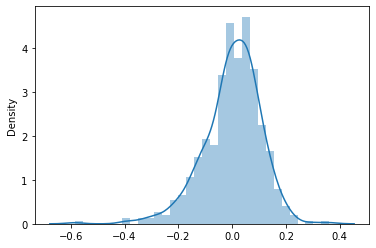

In [83]:
residual= Y_train - y_train_pred
sns.distplot(residual)
plt.savefig("./charts/residualdisplot.png",bbox_inches='tight', dpi=300)
plt.show()

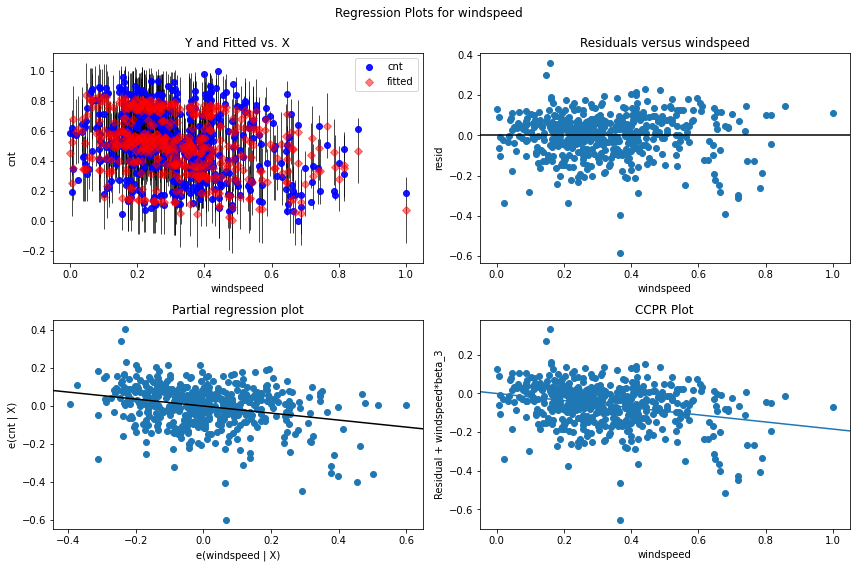

In [84]:
#create residual vs. predictor plot for 'atemp'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model,'windspeed', fig=fig)
plt.savefig("./charts/regressionplots.png",bbox_inches='tight', dpi=300)
plt.show()

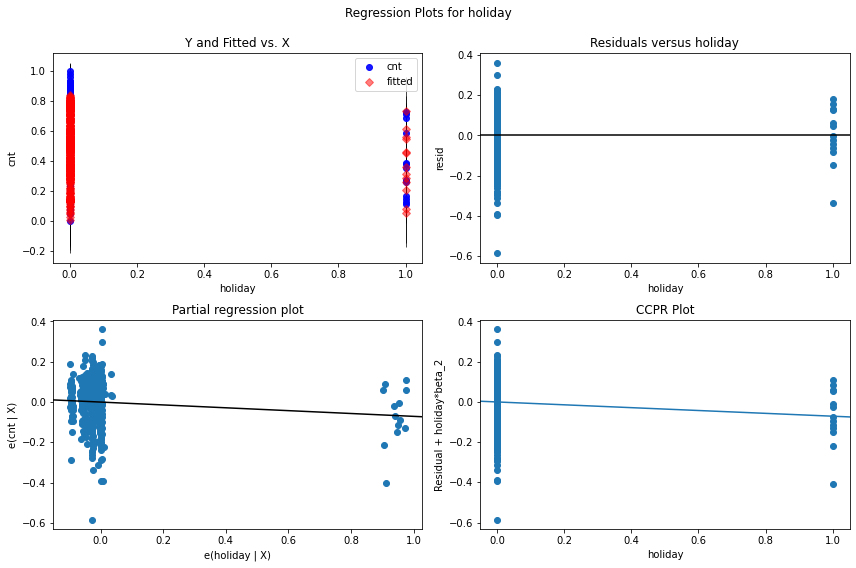

In [85]:
#create residual vs. predictor plot for 'atemp'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model,'holiday', fig=fig)
plt.savefig("./charts/regressionplots2.png",bbox_inches='tight', dpi=300)

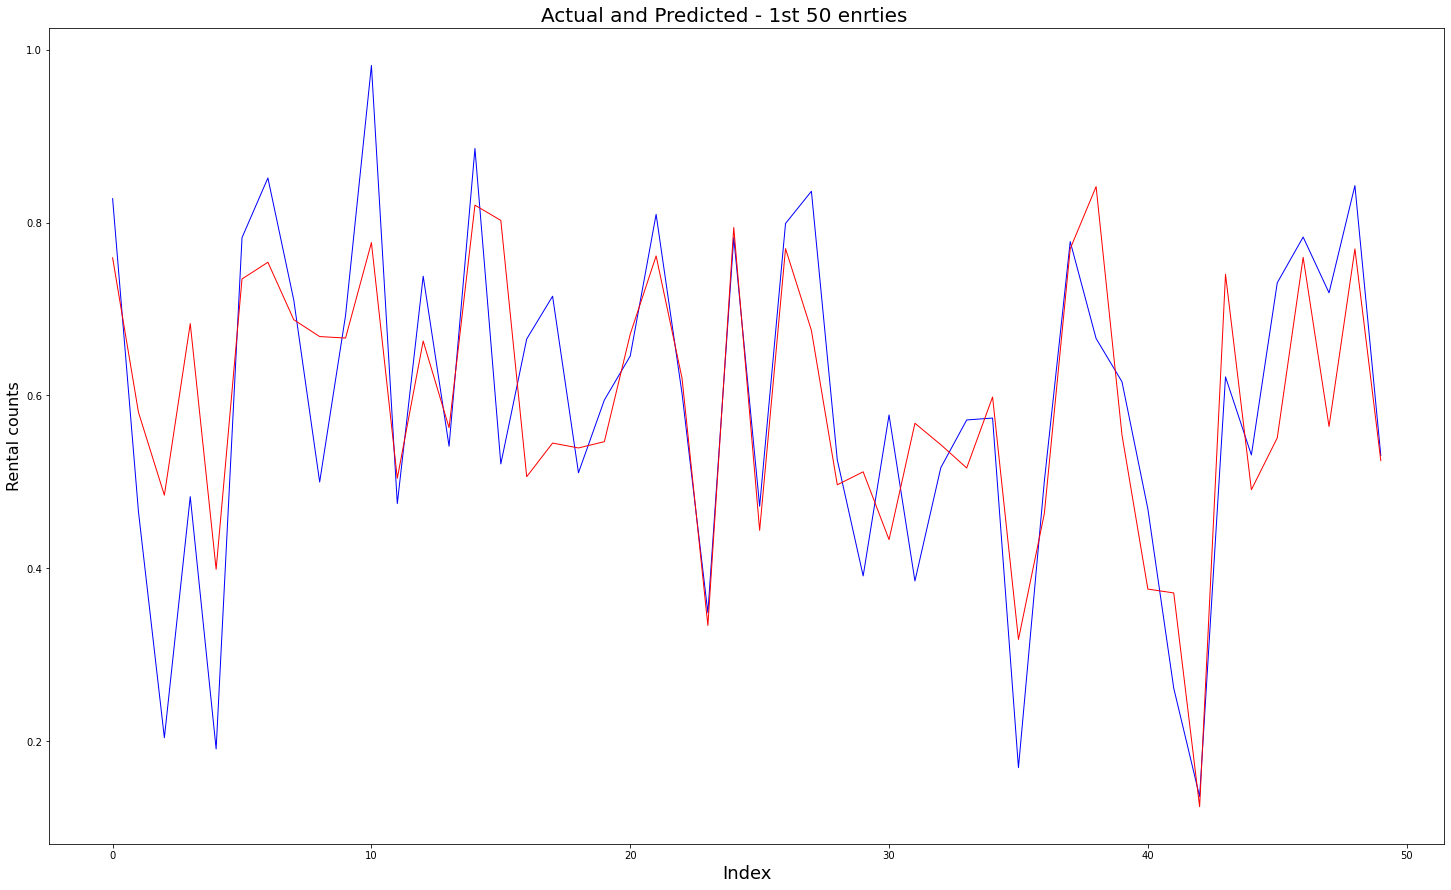

In [86]:
#Actual vs Predicted
c = [i for i in range(0,50,1)]
fig = plt.figure(figsize=(25,15))
plt.plot(c,Y_train.iloc[:50], color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_train_pred.iloc[:50], color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted - 1st 50 enrties',y=0.9, fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Rental counts', fontsize=16)                               # Y-label
plt.savefig("./charts/actualpredicted1.png",bbox_inches='tight', dpi=300)
plt.show()

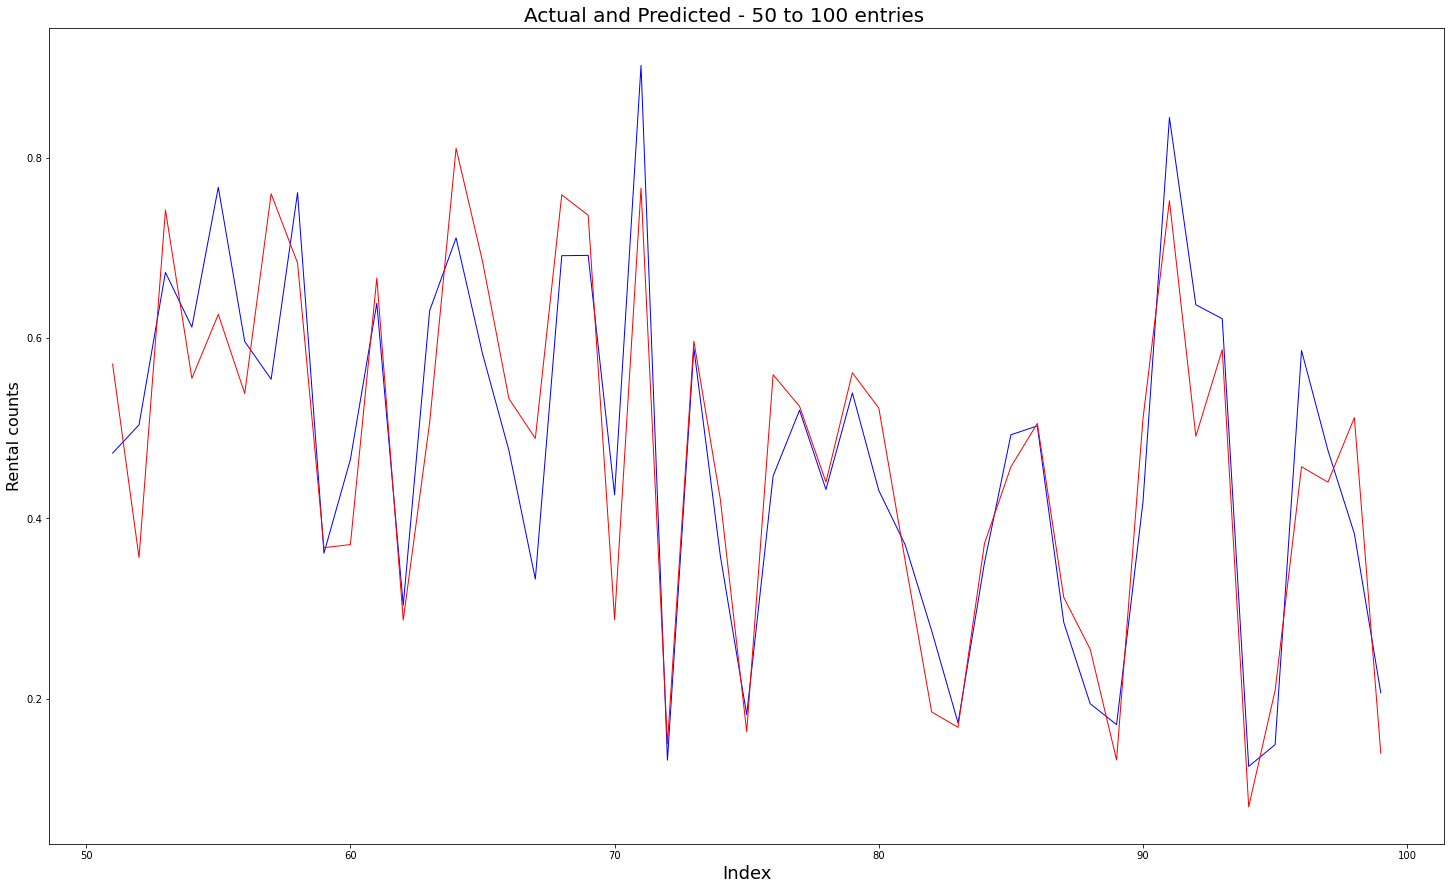

In [88]:
#Actual vs Predicted
c = [i for i in range(51,100,1)]
fig = plt.figure(figsize=(25,15))
plt.plot(c,Y_train.iloc[51:100], color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_train_pred.iloc[51:100], color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted - 50 to 100 entries' ,y=0.9, fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Rental counts', fontsize=16)                               # Y-label
plt.savefig("./charts/actualpredicted2.png",bbox_inches='tight', dpi=300)
plt.show()

## Lets check the R squared on the test set

In [89]:
# we need to prepare test data set also same way as training data set
# we only transform the test data set and not FIT finding xmax and xmin of test data set.
x_test = bikedata_test
x_test[num_var]=scaler.transform(x_test[num_var])
x_test.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,May,Nov,Oct,Sep,monday,saturday,sunday,thursday,tuesday,wednesday
184,185,04-07-2018,0,1,0,0.831783,0.769660,0.657364,0.084219,3065,...,0,0,0,0,0,0,0,0,0,1
535,536,20-06-2019,1,0,1,0.901354,0.842587,0.610133,0.153728,872,...,0,0,0,0,0,0,0,0,0,0
299,300,27-10-2018,0,0,1,0.511964,0.496145,0.837699,0.334206,240,...,0,0,1,0,0,1,0,0,0,0
221,222,10-08-2018,0,0,1,0.881625,0.795343,0.437098,0.339570,884,...,0,0,0,0,0,0,0,0,0,0
152,153,02-06-2018,0,0,1,0.817246,0.741471,0.314298,0.537414,736,...,0,0,0,0,0,1,0,0,0,0


In [90]:
Y_test = x_test.pop('cnt')


In [91]:
x_test = x_test.drop(['dteday','instant','casual','registered','atemp','spring','winter','summer','clearsky','cloudy&mist','hum','workingday','temp','monday','tuesday','wednesday','thursday','saturday','sunday'],axis=1)
x_test_sm = sm.add_constant(x_test)

In [92]:
x_test

,yr,holiday,windspeed,lightsnowOrrain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0.084219,0,0,0,0,0,1,0,0,0,0,0,0
535,1,0,0.153728,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0.334206,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,0.339570,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0.537414,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,0.283397,0,0,1,0,0,0,0,0,0,0,0,0
127,0,0,0.069510,0,0,0,0,0,0,0,0,1,0,0,0
640,1,0,0.052115,0,0,0,0,0,0,0,0,0,0,1,0
72,0,0,0.203418,0,0,0,0,0,0,0,1,0,0,0,0


In [93]:

# predict y test pred
y_test_pred = model.predict(x_test_sm)
test_residual=Y_test - y_test_pred

In [94]:
from sklearn.metrics import r2_score
r2score = r2_score(y_true=Y_test , y_pred = y_test_pred)

In [95]:
r2score

0.732385982336656

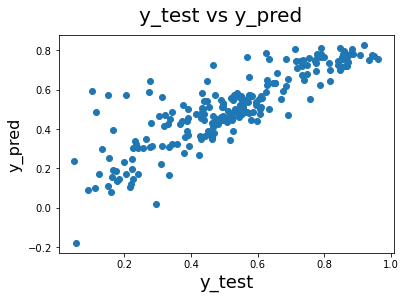

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.savefig("./charts/errordist1.png",bbox_inches='tight', dpi=300)


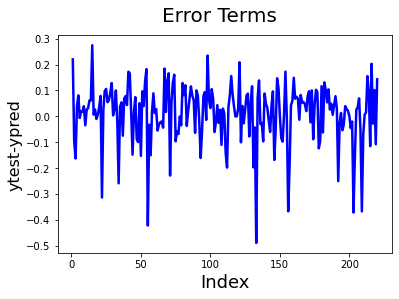

In [104]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,Y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-") 
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)
plt.savefig("./charts/errorterms.png",bbox_inches='tight', dpi=300)